# **Simple Logistic Regression (Binary Classification)**
#### **Description:**
Logistic regression is a statistical technique used to analyze the relationship between a dependent variable and one or more independent variables. In binary classification problems, the dependent variable is dichotomous, meaning it has only two possible outcomes. For example, whether a customer will purchase a product or not, whether a person has a certain disease or not, or whether an email is spam or not.

The goal of logistic regression is to find the best model that predicts the probability of an event occurring (in binary classification, the probability of the positive outcome). The logistic regression model uses a function called the sigmoid function, which maps any input value to a value between 0 and 1. This allows the model to output a probability score that can be interpreted as the likelihood of the positive outcome.

### **01. Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### **02. Reading the CSV File with Pandas**

In [2]:
# Defining the path of the csv
csv_path = "D:\Coding\Git Repository\Data-Science-Bootcamp-with-Python\Datasets\HR_comma_sep.csv"

In [3]:
# Reading the csv file with pandas library
df = pd.read_csv(csv_path)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# Checking the shape of the dataframe
df.shape

(14999, 10)

### **03. Data Cleaning**

#### **3.01 Checking the DataFrame for Null Values**

In [5]:
# Checking the dataframe if there is any null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

#### **3.02 Checking the datatypes for all the Columns**

In [6]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

### **04. Data Exploration and Visualization**

#### **4.01 Plotting the Correlation Matrix of the DataFrame**
Plotting the Correlation Matrix to check which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work) 

In [7]:
# Dropping the columns with qualitative data
data = df.loc[:, "satisfaction_level":"promotion_last_5years"]
# Checking the shape of the data
data.shape

(14999, 8)

In [8]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


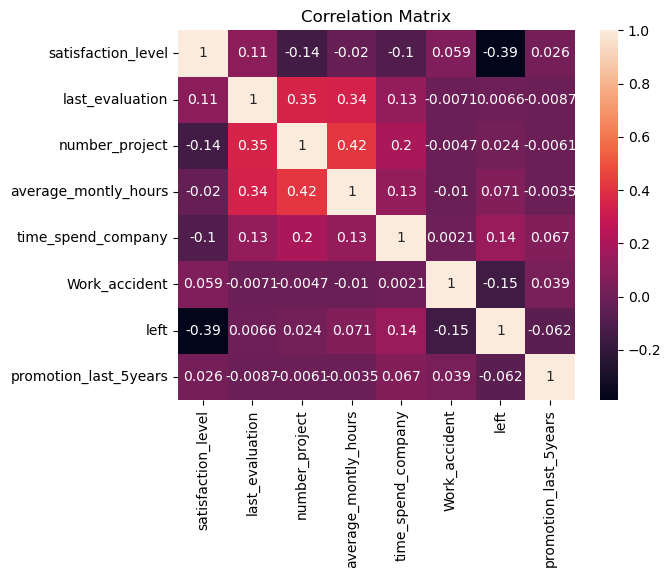

In [9]:
# Plotting the correlation matrix
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

**Interpretaion of Correlation Matrix:** <br>
A correlation matrix is a table that displays the pairwise correlations between all the variables in a dataset. Correlation coefficients range from -1 to 1, where a value of -1 indicates a perfect negative correlation, a value of 1 indicates a perfect positive correlation, and a value of 0 indicates no correlation.

In the given dataset, the correlation matrix shows that the 'satisfaction_level' column has the maximum negative correlation coefficient of -0.39 with the "left' column. This means that the satisfaction level of employees has a larger impact on their retention.

#### **4.02 Plotting Bar Charts between Employee Salaries and Retention**
The pandas crosstab() function is used to compute a cross-tabulation table of two or more factors. It is a useful tool in data analysis for examining the relationship between two or more variables, especially when one or both of the variables are categorical.

Here, we are calculating the total number of employees in each salary bracket who stayed or left by summing across the rows using pandas crosstab() function.

In [10]:
# Calculating the total number of employees who stayed or left in each salary bracket
salary_left_data = pd.crosstab(df.salary, df.left)
salary_left_data

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


In [11]:
# Renaming the column names
# 0 = Retained
# 1 = Left
columnNames = {
    0: "Retained",
    1: "Left"
}
salary_left_data.rename(columns=columnNames, inplace=True)
salary_left_data

left,Retained,Left
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


Text(0.5, 0, 'Salary')

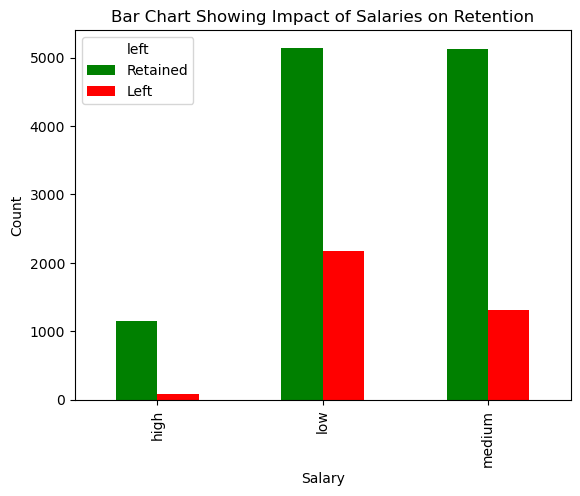

In [12]:
# Plotting the bar chart
salary_left_data.plot(kind="bar", color=["green", "red"])
plt.title("Bar Chart Showing Impact of Salaries on Retention")
plt.ylabel("Count")
plt.xlabel("Salary")

#### **4.03 Plotting Bar Charts between Departments and Retention**
Here, we are calculating the total number of employees in each department who stayed or left by summing across the rows using pandas crosstab() function.

In [13]:
# Calculating the total number of employees who stayed or left in each department
dept_left_data = pd.crosstab(df.Department, df.left)
dept_left_data.head()

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91


In [14]:
# Renaming the column names
# 0 = Retained
# 1 = Left
dept_left_data.rename(columns=columnNames, inplace=True)
dept_left_data.head()

left,Retained,Left
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91


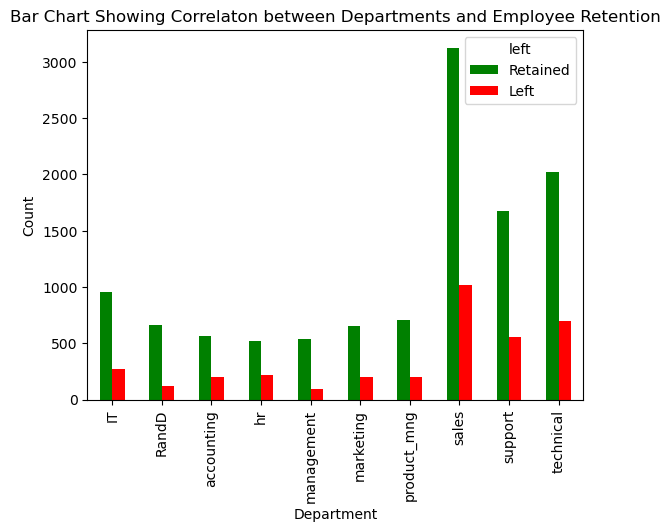

In [15]:
# Plotting the bar chart
dept_left_data.plot(kind="bar", color=["green", "red"])
plt.title("Bar Chart Showing Correlaton between Departments and Employee Retention")
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()

#### **4.04 Plotting the Scatterplot between 'satisfaction_level' and 'left'**

In [16]:
# Extracting a small sample from the dataframe to represent the scatterplot
test_df = df.sample(50, random_state=75)

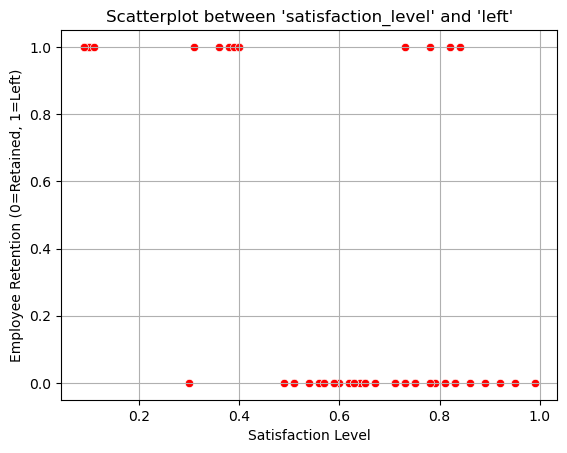

In [17]:
# Plotting the Scatterplot between 'satisfaction_level' and 'left'
sns.scatterplot(x=test_df["satisfaction_level"], y=test_df["left"], color="red")
plt.title("Scatterplot between 'satisfaction_level' and 'left'")
plt.ylabel("Employee Retention (0=Retained, 1=Left)")
plt.xlabel("Satisfaction Level")
plt.grid()
plt.show()

### **05. Dividing the Data into Training and Testing Set**

#### **5.01 Defifining the Dependent and Independent Variable**

In [18]:
# Dependent Variable (y) = "left"
# Independent Variable (x) = "satisfaction_level"
x = df[["satisfaction_level"]]
y = df[["left"]]

#### **5.02 Splitting the Data into Training and Testing Set**

In [19]:
# Importing the train_test_split from sklearn library
from sklearn.model_selection import train_test_split

In [20]:
# Training data = 70% and Testing data = 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=75)

### **06. Instantiating the Simple Logistic Regression Model**

#### **6.01 Importing Logistic Regression Model from sklearn Library**

In [21]:
# Importing the Logistic Regression Model from sklearn library
from sklearn.linear_model import LogisticRegression

#### **6.02 Generating a Logistic Regression Object**

In [22]:
# Creating a linear regression object
log_reg = LogisticRegression()
# Feeding the training data to the model
log_reg.fit(x_train, y_train)

LogisticRegression()

#### **6.03 Getting the Coefficients of the Linear Regression Model**

In [23]:
# Getting the slope of the model
log_reg.coef_

array([[-3.84563398]])

In [24]:
# Getting the y-intercept of the model
log_reg.intercept_

array([0.97025215])

### **07. Validation of the Model**

#### **7.01 Validating the Logistic Regression Model**

In [25]:
# Predicting the left status of the x_test (satisfaction_level) data
y_predict = log_reg.predict(x_test)
y_predict

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [26]:
# Getting the accuracy score of the model
log_reg.score(x_test, y_test)

0.7624444444444445

In [27]:
# Getting the prediction probability of the x_test data
log_reg.predict_proba(x_test)

array([[0.9118948 , 0.0881052 ],
       [0.62036288, 0.37963712],
       [0.35762467, 0.64237533],
       ...,
       [0.61126493, 0.38873507],
       [0.67300916, 0.32699084],
       [0.93368009, 0.06631991]])